# Fourier Series Calculator, Extensions Addendum.

## Function Definition

The function definition will define all the functions needed to calculate our Fourier series. As of right now, we have functions to calculate the ${a_0}$ and ${\alpha_n}$ and ${\beta_n}$ of functions. Let ${L = P/2}$ where P is the period.

**This calculator works differently as it is meant to handle extension series.**

* The function definitions are as follows:

    * ${a_0 = \frac{2}{L}\int_{0}^{L} f(t)  dt}$

    * ${\alpha_n = \frac{2}{L}\int_{0}^{L} f(t)cos(\frac{n\pi }{L}t)  dt}$

    * ${\beta_n = \frac{2}{L}\int_{0}^{L} f(t)cos(\frac{n\pi }{L}t)  dt}$

In [88]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt

t = symbols('t', real=True)
n = symbols('n', real=True, integer=True)

def L2_integrate(function, basis, a, b):
    f = function * conjugate(basis)
    integral = integrate(f, (t, a, b))
    
    return integral


def azero(function, L, lB, uB):
    f = function
    integral = (2*L2_integrate(function, 1, lB, uB)/L).simplify()

    integral = integral.simplify()
    return integral


def an(function, L, lB, uB):
    f = function
    basis = cos(n*pi*t/L)
    integral = (2*L2_integrate(f, basis, lB, uB)/L).simplify()

    integral = integral.simplify()
    return integral


def bn(function, L, lB, uB):
    f = function
    basis = sin(n*pi*t/L)
    integral = (2*L2_integrate(f, basis, lB, uB)/L).simplify()

    integral = integral.simplify()
    return integral



# Defining our original Fourier Series function (piecewise, continuous)

### Piecewise

In [102]:
P = 4*pi
L = P / 2

f = Piecewise(
    (5*sin(t/2), t < 2*pi),   # t is zero before time pi
#    (3, t < 6),      # otherwise, t is 1
#    (0, t < 9)
)

Eq(symbols('f'), f)

Eq(f, Piecewise((5*sin(t/2), t < 2*pi)))

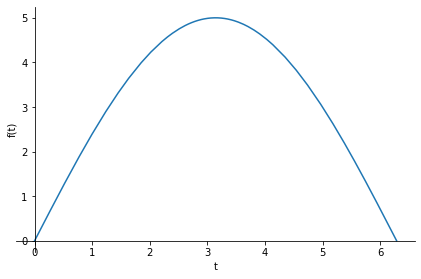

In [103]:
plot(f, (t, 0, 2*L))

### Continuous

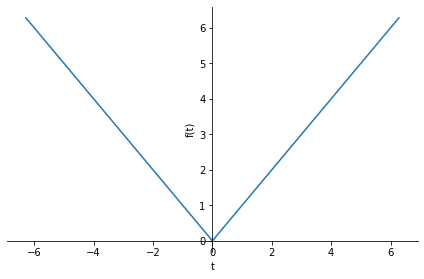

In [82]:
L = 2*pi
f = abs(t)

plot(f, (t, -L, L))

# Using $\{\cos(n \pi t/L), \sin(n \pi t/L\}$ as basis

We will be using both the ${cos(\frac{n\pi }{L}t)}$ and ${sin(\frac{n\pi }{L}t)}$ functions as our bases and we will integrate from them.

In [104]:
a_n = an(f, L, 0, L)

Eq(symbols('a_n'), a_n)

Eq(a_n, Piecewise((0, Eq(n, -1) | Eq(n, 1)), (-(10 - 10*(-1)**(n + 1))/(pi*(n**2 - 1)), True)))

In [105]:
b_n = bn(f, L, 0, L)

Eq(symbols('b_n'), b_n)

Eq(b_n, Piecewise((-5, Eq(n, -1)), (5, Eq(n, 1)), (0, True)))

In [106]:
a_0 = azero(f, L, 0, L)

Eq(symbols('a_0'), a_0)

Eq(a_0, 20/pi)

In [108]:
num = 12

approx = a_0/2

cosine = cos(n*pi*t/L)
sine = sin(n*pi*t/L)

for num_i in range (1, num+1):
    approx += (a_n*cosine + b_n*sine).subs(n, num_i)

approx


5*sin(t/2) - 20*cos(t)/(3*pi) - 4*cos(2*t)/(3*pi) - 4*cos(3*t)/(7*pi) - 20*cos(4*t)/(63*pi) - 20*cos(5*t)/(99*pi) - 20*cos(6*t)/(143*pi) + 10/pi

# Final Results (Plot, Power Spectrum)

## Plot

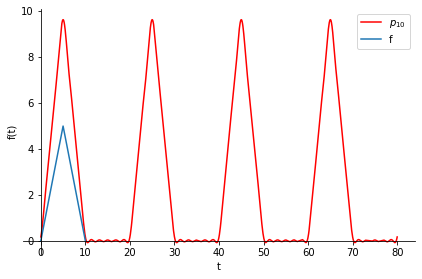

In [57]:
fig = plot(approx, f, (t, 0, 4*P), legend=True, show=False)
fig[0].line_color='r'
fig[0].label = '${' + 'p_{' + str(num) + '}}$'
fig[1].label = 'f'
fig.show()

## Power Spectrum

* TO-DO